<a href="https://colab.research.google.com/github/dcoder0111/dcoder0111sPythonTrack/blob/main/youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Recent Tech Youtube Video Analysis</h1>
<h4>Author: Chang Dakota Sum Kiu</h4>
<h4>Last Modified: 22/09/2021</h4>


---


<p>This notebook uses YouTube's API to analyse the recent 10 videos of famous technology YouTubers. </p>

In [ ]:
# Importing libraries
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
# Technology YouTuber IDs
ids = ['UCEcrRXW3oEYfUctetZTAWLw', 'UCBJycsmduvYEL83R_U4JriQ', 'UC0vBXGSyV14uvJ4hECDOl0Q', 'UCXuqSBlHAE6Xw-yeJA0Tunw', 'UCdBK94H6oZT2Q7l0-b0xmMg', 'UCeeFfhMcJa1kjtfZAGskOCA', 'UCBZiUUYeLfS5rIj4TQvgSvA', 'UCZSlfzadjnw7G419c_OJ9eg', 'UCMiJRAwDNSNzuYeN2uWa0pA', 'UChIZGfcnjHI0DG4nweWEduw', 'UCR0AnNR7sViH3TWMJl5jyxw', 'UCVYamHliCI9rw1tHR1xbkfw','UC9fSZHEh6XsRpX-xJc6lT3A', 'UCXGgrKt94gR6lmN4aN3mYTg', 'UC3fg6pL63upkXCc0T203wVg', 'UCx9bOYEjkevIDYONBAstK-A', 'UC3XdYJjWliOdKuZMNaTiP8Q', 'UCiQMYozSSTkJ2twtZM1bG9w', 'UCjSEJkpGbcZhvo0lr-44X_w', 'UC4xKdmAXFh4ACyhpiQ_3qBw', 'UCoi3Uk6JtP9QgA5BRwnh6NQ']

In [ ]:
# Creating a list for relevant information extracted from the recent 10 videos of the above YouTubers.
id_list = []
for x in ids:
  if x not in id_list:
    id_list.append(x)

titles = []
video_description = []
count = []
average = []
min = []
max = []
views = []
for id in id_list:
  url = f"https://www.youtube.com/feeds/videos.xml?channel_id={id}"
  xml_page = requests.get(url).content
  soup_page = soup(xml_page, "xml")
  videos = soup_page.findAll('entry')

  for video in videos:
    titles.append(video.title.text)
    video_description.append(video.description.text.split("\n\n")[0].split("\n")[0])
    count.append(int(video.starRating.get('count')))
    average.append(float(video.starRating.get('average')))
    views.append(int(video.statistics.get('views')))

dictionary = {
    'titles' : titles,
    'video_description' : video_description,
    'count' : count,
    'average' : average,
    'views' : views,
}

stats = pd.DataFrame(dictionary)
stats['description_length'] = stats['video_description'].apply(lambda x:len(x))
stats['title_length'] = stats['titles'].apply(lambda x:len(x))

In [ ]:
stats

,titles,video_description,count,average,views,description_length,title_length
0,Our Favorite Tech and Moments of 2021!,It's the holiday season so the team got togeth...,759,5.0,10830,270,38
1,Is This Our Favorite Folding Phone?,"As the year comes to an end, Marques and Andre...",1330,5.0,29093,280,35
2,"Sustainable Smartphones, A Retractable Camera,...",This week Marques and Andrew talk a little bit...,1778,5.0,44470,357,70
3,How MrBeast’s Squid Game was Made with @SoKris...,Marques and Andrew sit down with Sam and Micah...,1506,5.0,31245,456,53
4,"A Streamlabs Explainer, Adele Saves Spotify, a...",We hope everyone is enjoying the holiday but t...,1859,5.0,42340,385,78
...,...,...,...,...,...,...,...
310,iPhone 14 Prices May SHOCK YOU!,We are still hearing a lot of rumors swirling ...,4081,5.0,115099,609,31
311,M1 Pro Mac mini - Could it Be The Best Mac Yet!?,There was one missing link at Apple's last eve...,1257,5.0,44855,464,48
312,M2 MacBook Air - Will it be Apple's BEST Laptop!?,The recent M1 Pro Macs might not be the Macs d...,1303,5.0,67804,469,49
313,Apple Fixed Their Biggest Mistake,For years many Mac fans have felt that Apple w...,2739,5.0,129802,883,33


In [ ]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   titles              315 non-null    object 
 1   video_description   315 non-null    object 
 2   count               315 non-null    int64  
 3   average             315 non-null    float64
 4   views               315 non-null    int64  
 5   description_length  315 non-null    int64  
 6   title_length        315 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 17.4+ KB


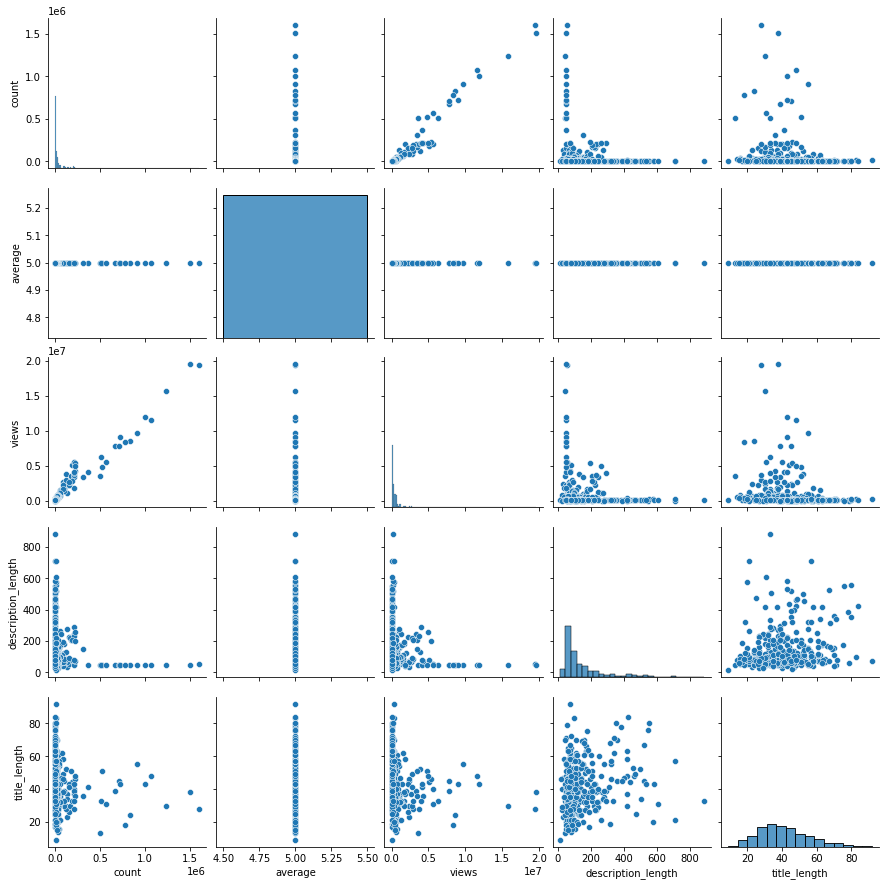

In [ ]:
# Uses pairplot to identify potential correlation between each statistic
sns.pairplot(stats)

In [ ]:
stats

,titles,video_description,count,average,views,description_length,title_length
0,Our Favorite Tech and Moments of 2021!,It's the holiday season so the team got togeth...,759,5.0,10830,270,38
1,Is This Our Favorite Folding Phone?,"As the year comes to an end, Marques and Andre...",1330,5.0,29093,280,35
2,"Sustainable Smartphones, A Retractable Camera,...",This week Marques and Andrew talk a little bit...,1778,5.0,44470,357,70
3,How MrBeast’s Squid Game was Made with @SoKris...,Marques and Andrew sit down with Sam and Micah...,1506,5.0,31245,456,53
4,"A Streamlabs Explainer, Adele Saves Spotify, a...",We hope everyone is enjoying the holiday but t...,1859,5.0,42340,385,78
...,...,...,...,...,...,...,...
310,iPhone 14 Prices May SHOCK YOU!,We are still hearing a lot of rumors swirling ...,4081,5.0,115099,609,31
311,M1 Pro Mac mini - Could it Be The Best Mac Yet!?,There was one missing link at Apple's last eve...,1257,5.0,44855,464,48
312,M2 MacBook Air - Will it be Apple's BEST Laptop!?,The recent M1 Pro Macs might not be the Macs d...,1303,5.0,67804,469,49
313,Apple Fixed Their Biggest Mistake,For years many Mac fans have felt that Apple w...,2739,5.0,129802,883,33


---
###Implementing Machine Learning

In [ ]:
# importing machine learning libraries for splitting dataset
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
X = stats[['title_length', 'description_length']]
y =  stats['average']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [ ]:
print('X_test: ' + str(len(X_test)))
print('y_test: ' + str(len(y_test)))

X_test: 95
y_test: 95


In [ ]:
# importing machine learning libraries for Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# training the machine learning model
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# importing machine learning libraries for evaluation of the model
from sklearn.metrics import mean_squared_error

In [ ]:
# evaluating the model
y_pred = lm.predict(X_test)
mean_squared_error(y_true=y_test, y_pred=y_pred)

0.0




---


###Creating a Word Cloud to find recent trends in YouTube video topics

In [ ]:
big_string = ''

for title in stats['titles']:
  big_string = big_string + ' ' + str(title)

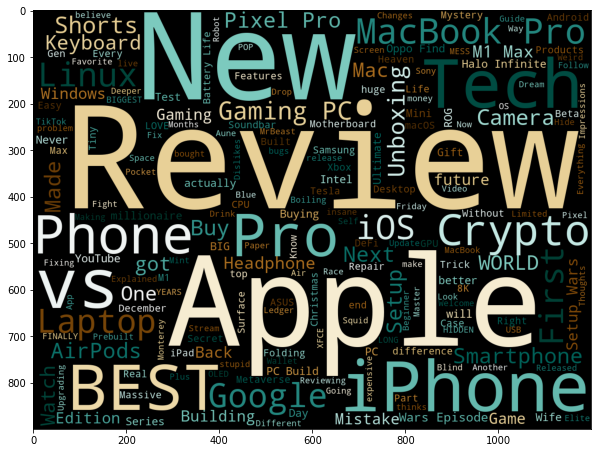

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color='black', colormap='BrBG', width=2000,height=1000).generate(big_string)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
plt.imshow(wc)

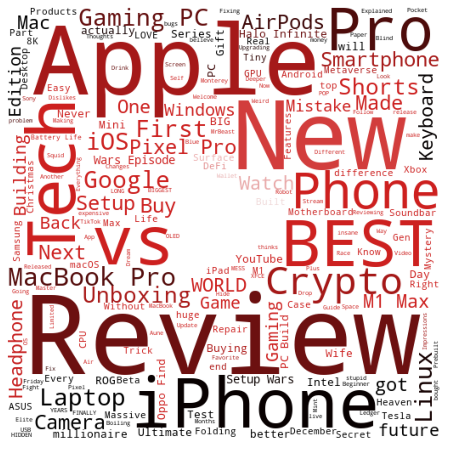

In [ ]:
from PIL import Image
import numpy as np
mask = np.array(Image.open("/content/youtube.png"))

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc = WordCloud(background_color='white', mask=mask, height=1000, width=400).generate(big_string)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,8])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.imshow(wc)

In [ ]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In the wordcloud, we will be able to observe the recent buzzwords of YouTube video titles.

---

###Slope Graph

In [ ]:
graph_x = stats['views'].sort_values()

In [ ]:
graph_y = stats['count'].sort_values()
graph_y

150        138
157        185
277        187
270        194
152        212
        ...   
112     999639
106    1068934
95     1240942
118    1502923
113    1605555
Name: count, Length: 315, dtype: int64

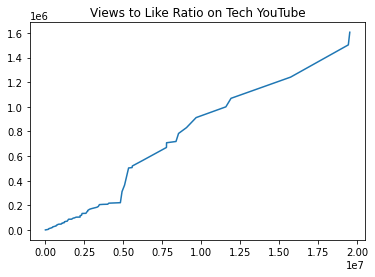

In [ ]:
# from matplotlib.pyplot import rcParams
# rcParams['font.family'] = ['Times New Roman']
# rcParams['font.size'] = 20
# plt.title('Distribution of Movies with Keywords Relating to Magic in the Title', y = 1.4, fontdict={'fontsize': 25,
#         'fontweight': 20})

plt.title('Views to Like Ratio on Tech YouTube')
plt.plot(graph_x, graph_y)

In [ ]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.scatter(stats, x="views", y="count", trendline="ols", title='Views to Like Ratio on Tech YouTube')
fig.show()

In [ ]:
import plotly.express as px

fig.write_html("/content/sample_data/correlationGraph.html")